In [79]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pyFAST.input_output as io

In [80]:
current_dir = os.getcwd()
x = np.arange(1, 100)
output_dir = os.path.join(
    current_dir, '../../mod_test_v3/report_data/FAST_output_files/')
FAST_file = glob('%s*FAST*' % output_dir)[0]
hybrid_file = glob('%s*hybrid*' % output_dir)[0]
FAST_df = io.fast_output_file.FASTOutputFile(FAST_file).toDataFrame()
hybrid_df = io.fast_output_file.FASTOutputFile(hybrid_file).toDataFrame()

FAST_df

,Time_[s],Azimuth_[deg],RotSpeed_[rpm],GenSpeed_[rpm],OoPDefl1_[m],IPDefl1_[m],TwstDefl1_[deg],BldPitch1_[deg],TTDspFA_[m],TTDspSS_[m],...,B1RdtFzi_[N],B1RdtMxi_[N-m],B1RdtMyi_[N-m],B1RdtMzi_[N-m],B1Surge_[m],B1Sway_[m],B1Heave_[m],B1Roll_[rad],B1Pitch_[rad],B1Yaw_[rad]
0,0.0000,0.000000,12.100002,1173.700038,0.0,0.0,0.0,0.0,-2.008666e-21,1.508566e-23,...,-1.570502e+06,78052.477921,-337363.236490,54.751393,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.245122e-11
1,0.0125,0.906197,12.100002,1173.700038,0.0,0.0,0.0,0.0,-2.008666e-21,1.508566e-23,...,-1.569944e+06,78062.361769,-336700.389797,33.046456,0.000000,0.000000,0.000012,0.000000e+00,0.000000e+00,-1.245122e-11
2,0.0250,1.812395,12.100002,1173.700038,0.0,0.0,0.0,0.0,-2.008666e-21,1.508566e-23,...,-1.569805e+06,72164.999089,-539282.910569,13.858033,0.000000,0.000000,0.000035,0.000000e+00,0.000000e+00,-1.245122e-11
3,0.0375,2.724084,12.100002,1173.700038,0.0,0.0,0.0,0.0,-2.008666e-21,1.508566e-23,...,-1.569665e+06,72158.409857,-539089.580284,-16.969270,0.000000,0.000000,0.000071,-2.459231e-08,1.848895e-07,-1.245122e-11
4,0.0500,3.630281,12.100002,1173.700038,0.0,0.0,0.0,0.0,6.633663e-21,1.508566e-23,...,-1.569386e+06,72148.526009,-538841.012774,-40.247030,0.000000,0.000000,0.000130,-2.459231e-08,1.848895e-07,-1.245122e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,29.9500,14.372838,12.100002,1173.700038,0.0,0.0,0.0,0.0,-2.008666e-21,1.508566e-23,...,1.077899e+06,-70277.724632,668009.486233,8606.811415,2.794748,0.195743,0.669284,-1.215131e-03,8.881538e-03,4.171052e-04
2397,29.9625,15.279035,12.100002,1173.700038,0.0,0.0,0.0,0.0,-1.261022e-16,-1.722573e-17,...,1.080363e+06,-70182.180767,667457.113988,8609.327930,2.796801,0.195875,0.669944,-1.214024e-03,8.873957e-03,4.172773e-04
2398,29.9750,16.185232,12.100002,1173.700038,0.0,0.0,0.0,0.0,1.259945e-16,1.720877e-17,...,1.082827e+06,-70086.636902,666932.360356,8610.900751,2.798854,0.196007,0.670604,-1.212917e-03,8.866377e-03,4.174494e-04
2399,29.9875,17.091430,12.100002,1173.700038,0.0,0.0,0.0,0.0,1.258908e-16,3.107155e-17,...,1.085245e+06,-69987.798422,666379.988111,8613.102702,2.800907,0.196142,0.671241,-1.211786e-03,8.858796e-03,4.176152e-04


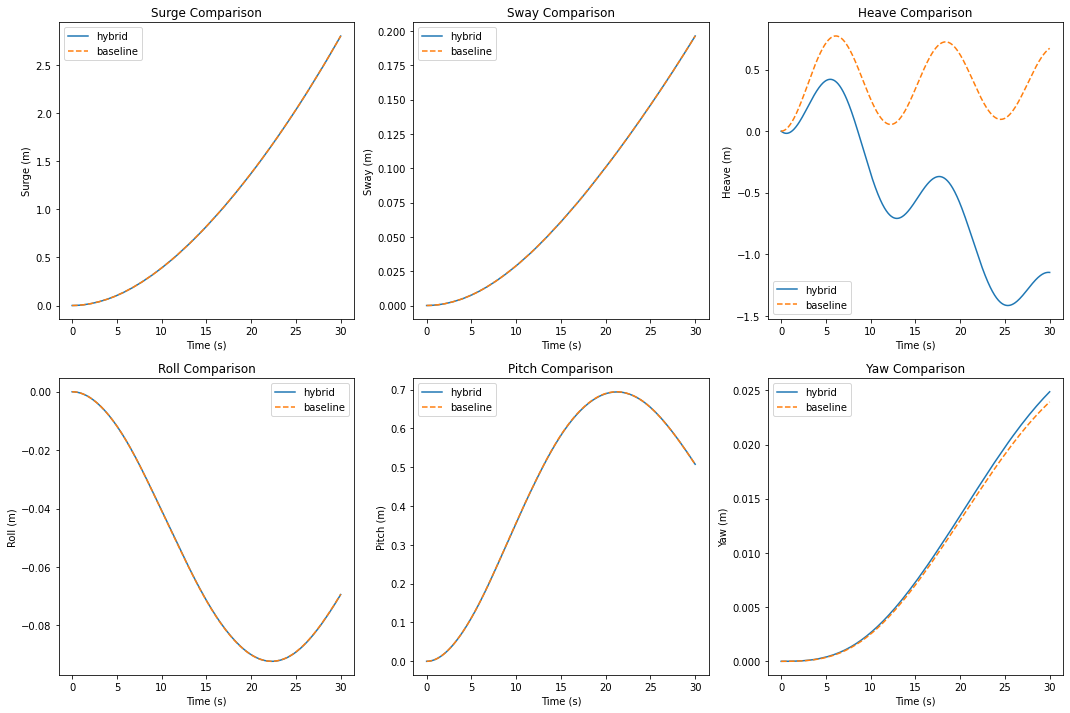

In [94]:
COLUMNS = ['PtfmSurge_[m]', 'PtfmSway_[m]', 'PtfmHeave_[m]',
          'PtfmRoll_[deg]', 'PtfmPitch_[deg]', 'PtfmYaw_[deg]']

NAMES = ['Surge', 'Sway', 'Heave', 'Roll', 'Pitch', 'Yaw']

time = FAST_df['Time_[s]']
fig, axes = plt.subplots(2,3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(COLUMNS):
    ax = axes[i]
    hybrid = ax.plot(time, hybrid_df[col], label='hybrid')
    baseline = ax.plot(time, FAST_df[col], ls='--', label='baseline')    
    ax.legend()
    ax.set_title('%s Comparison' % NAMES[i])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('%s (m)' % NAMES[i])

In [92]:
#fig.savefig("comparison.jpg")